# How is NBA Salary linked to Player Performance?

### The goals of this project:

#### 1. Explore and analyze how NBA players' salaries are linked to performance. 
#### 2. Players who are overpaid/underpaid by position
#### 3. Driver better decisions to identify quality or above-average players at a low-cost or below-average pay (in per minute terms)

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

### Scraping Player Season Totals from 2000 to 2022 from Basketball Reference

#### https://www.basketball-reference.com/leagues/NBA_2020_totals.html

In [3]:
#Scraping from Basketball Reference to obtain player season totals

years = list(range(2000, 2022))

url_totals = "https://www.basketball-reference.com/leagues/NBA_{}_totals.html"


#For loop to request all years from 2000 to 2022 and store as html 
for year in years:
    url = url_totals.format(year)
    data = requests.get(url)
    
    with open("totals/{}.html".format(year), "w+", encoding = "utf-8") as f:
        f.write(data.text)

In [4]:
# Read in HTML

with open("totals/2000.html", encoding ="utf-8") as f:
    page = f.read()

In [5]:
# Parse pages with BeautifulSoup

soup = BeautifulSoup(page, "html.parser")


In [6]:
# Find the id for the stats table
totals_2000_season = soup.find(id= "all_totals_stats")

In [7]:
# Read in the html to verify
totals_2000_szn = pd.read_html(str(totals_2000_season))

totals_2000_szn[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Tariq Abdul-Wahad,SG,25,TOT,61,56,1578,274,646,...,.756,101,190,291,98,59,28,106,147,697
1,1,Tariq Abdul-Wahad,SG,25,ORL,46,46,1205,223,515,...,.762,77,162,239,72,53,16,87,116,563
2,1,Tariq Abdul-Wahad,SG,25,DEN,15,10,373,51,131,...,.738,24,28,52,26,6,12,19,31,134
3,2,Shareef Abdur-Rahim,SF,23,VAN,82,82,3223,594,1277,...,.809,218,607,825,271,89,87,249,244,1663
4,3,Cory Alexander,PG,26,DEN,29,2,329,28,98,...,.773,8,34,42,58,24,2,28,39,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,436,Haywoode Workman,PG,34,MIL,23,1,248,23,62,...,.692,1,16,17,44,11,0,14,23,66
513,436,Haywoode Workman,PG,34,TOR,13,1,102,8,28,...,.500,0,9,9,17,9,0,4,14,20
514,437,Metta World Peace,SF,20,CHI,72,63,2238,309,759,...,.674,62,246,308,202,119,39,166,159,866
515,438,Lorenzen Wright,C,24,ATL,75,0,1205,180,361,...,.644,117,188,305,21,29,40,66,203,448


In [8]:
# For loop to combine all total htmls into a list of dataframes

szn_ttl_00_22 = []

for year in years:
    with open("totals/{}.html".format(year), encoding = "utf-8") as f:
        page = f.read()
        soup = BeautifulSoup(page, "html.parser")
        total_table = soup.find(id = "all_totals_stats")
        total = pd.read_html(str(total_table))[0]
        total["Year"] = year
        
        szn_ttl_00_22.append(total)

In [9]:
# # Using selenium to parse JS Pages
# from selenium import webdriver
# import time

# driver = webdriver.Chrome("/Users/alexc/Desktop/NBA Scrape Project/NBA_Salaries_Performance/NBA_Salaries_Performance/chromedriver")

In [10]:
# player_szn_stats = "https://www.basketball-reference.com/leagues/NBA_{}_totals.html"

# for year in years:
#     url = player_szn_stats.format(year)

#     driver.get(url)
#     driver.execute_script("window.scrollTo(1,10000)")
#     time.sleep(2)

#     html = driver.page_source
    
#     with open("Totals/{}.html".format(year), "w+", encoding = 'utf-8') as f:
#         f.write(html)

In [11]:
# # For loop to combine all the htmls into a list of dfs

# player_szn_totals = []

# for year in years:
#     with open("Totals/{}.html".format(year), encoding= "utf-8") as f:
#         page = f.read()
#     soup = BeautifulSoup(page, "html.parser")
#     total_table = soup.find(id= "all_totals_stats")
#     total_stats = pd.read_html(str(total_table))[0]
#     total_stats["Year"] = year
    
#     player_szn_totals.append(total_stats)

In [12]:
# player_szn_totals_df = pd.concat(player_szn_totals)
# player_szn_totals_df.to_csv("./Data Files/player_szn_totals.csv")

In [13]:
# player_szn_totals_df.shape

In [16]:
#Excluding rows where Rk is Rk

szn_ttl_df_cleaned = szn_ttl_df[szn_ttl_df["Rk"] != "Rk"]

In [17]:
# szn_ttl_df_cleaned.to_csv("./Data Files/szn_ttl_df_cleaned.csv")

In [18]:
# Some players have an asterick next to their names, we need to remove this
# so we can merge with salary dataset

szn_ttl_df_cleaned["Player"] = szn_ttl_df_cleaned["Player"].str.replace("*", "", regex = False)

szn_ttl_df_cleaned.head(20)

<ipython-input-18-d3c2ebe2b395>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  szn_ttl_df_cleaned["Player"] = szn_ttl_df_cleaned["Player"].str.replace("*", "", regex = False)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Tariq Abdul-Wahad,SG,25,TOT,61,56,1578,274,646,...,101,190,291,98,59,28,106,147,697,2000
1,1,Tariq Abdul-Wahad,SG,25,ORL,46,46,1205,223,515,...,77,162,239,72,53,16,87,116,563,2000
2,1,Tariq Abdul-Wahad,SG,25,DEN,15,10,373,51,131,...,24,28,52,26,6,12,19,31,134,2000
3,2,Shareef Abdur-Rahim,SF,23,VAN,82,82,3223,594,1277,...,218,607,825,271,89,87,249,244,1663,2000
4,3,Cory Alexander,PG,26,DEN,29,2,329,28,98,...,8,34,42,58,24,2,28,39,82,2000
5,4,Ray Allen,SG,24,MIL,82,82,3070,642,1411,...,83,276,359,308,110,19,183,187,1809,2000
6,5,Rafer Alston,PG,23,MIL,27,0,361,27,95,...,5,18,23,70,12,0,29,29,60,2000
7,6,John Amaechi,C,29,ORL,80,53,1684,306,700,...,62,204,266,95,35,37,139,161,836,2000
8,7,Derek Anderson,SG,25,LAC,64,58,2201,377,860,...,80,178,258,220,90,11,167,149,1080,2000
9,8,Kenny Anderson,PG,29,BOS,82,82,2593,434,986,...,55,170,225,420,139,8,130,230,1149,2000


In [19]:
szn_ttl_df_cleaned.groupby(["Player", "Year"]).get_group(("A.J. Price", 2015))


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
487,373,A.J. Price,PG,28,TOT,26,0,324,51,137,...,6,26,32,46,7,0,14,15,133,2015
488,373,A.J. Price,PG,28,IND,10,0,193,39,89,...,2,12,14,27,4,0,10,9,105,2015
489,373,A.J. Price,PG,28,CLE,11,0,87,9,34,...,4,11,15,13,3,0,3,1,22,2015
490,373,A.J. Price,PG,28,PHO,5,0,44,3,14,...,0,3,3,6,0,0,1,5,6,2015


In [21]:
'''This function take in a single dataframe and returns the record if there is only one row. 
If there are multiple rows for a player, it will take the total or TOT and replace the Team(Tm) with the 
most current team.
'''

def single_record(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[1,:]["Tm"]
        return row

szn_ttl_df_cleaned = szn_ttl_df_cleaned.groupby(["Player", "Year"]).apply(single_record)

In [22]:
szn_ttl_df_cleaned.head(20)

Rk         Player Pos Age   Tm   G  GS    MP   FG  \
Player        Year                                                           
A.C. Green    2000 185  154     A.C. Green  PF  36  LAL  82  82  1929  173   
              2001 188  152     A.C. Green  PF  37  MIA  82   1  1411  144   
A.J. Bramlett 2000 58    47  A.J. Bramlett   C  23  CLE   8   0    61    4   
A.J. Guyton   2001 191  155    A.J. Guyton  PG  22  CHI  33   8   630   78   
              2002 186  160    A.J. Guyton  PG  23  CHI  45   6   607   88   
              2003 173  146    A.J. Guyton  PG  24  GSW   2   0     9    0   
A.J. Hammons  2017 217  171   A.J. Hammons   C  24  DAL  22   0   163   17   
A.J. Price    2010 451  335     A.J. Price  PG  23  IND  56   2   865  145   
              2011 481  339     A.J. Price  PG  24  IND  50   0   795  114   
              2012 419  357     A.J. Price  PG  25  IND  44   1   568   59   
              2013 438  344     A.J. Price  PG  26  WAS  57  22  1278  161   
              2014 473  360     A.J. Price  SG  27  MIN  28   0    99   19   
              2015 487  373     A.J. Price  PG  28  IND  26   0   324   51   
Aaron Brooks  2008 74    60   Aaron Brooks  PG  23  HOU  51   0   608   93   
              2009 79    61   Aaron Brooks  PG  24  HOU  80  35  1998  316   
              2010 77    62   Aaron Brooks  PG  25  HOU  82  82  2919  575   
              2011 94    64   Aaron Brooks  PG  26  HOU  59  12  1284  220   
              2013 74    60   Aaron Brooks  PG  28  SAC  53  20   997  143   
              2014 87    65   Aaron Brooks  PG  29  HOU  72  12  1557  233   
              2015 77    63   Aaron Brooks  PG  30  CHI  82  21  1885  344   

                         FGA  ...  ORB  DRB  TRB  AST STL BLK  TOV   PF   PTS  \
Player        Year            ...                                               
A.C. Green    2000 185   387  ...  160  326  486   80  53  18   53  127   413   
              2001 188   324  ...  107  206  313   39  30   8   45  119   367   
A.J. Bramlett 2000 58     21  ...   12   10   22    0   1   0    3   13     8   
A.J. Guyton   2001 191   192  ...   10   26   36   64   9   5   24   35   198   
              2002 186   244  ...   12   32   44   81  10   7   37   23   244   
              2003 173     4  ...    0    0    0    2   1   0    1    0     0   
A.J. Hammons  2017 217    42  ...    8   28   36    4   1  13   10   21    48   
A.J. Price    2010 451   354  ...   12   76   88  106  35   3   59   53   410   
              2011 481   320  ...   16   56   72  111  29   1   53   61   323   
              2012 419   174  ...   13   48   61   86  20   2   32   30   172   
              2013 438   413  ...   20   94  114  205  33   3   64   73   441   
              2014 473    46  ...    1    9   10   13   1   0    7    5    44   
              2015 487   137  ...    6   26   32   46   7   0   14   15   133   
Aaron Brooks  2008 74    225  ...   13   43   56   87  13   5   44   69   264   
              2009 79    783  ...   33  124  157  238  46   8  125  152   894   
              2010 77   1331  ...   54  161  215  434  69  14  232  199  1604   
              2011 94    587  ...   20   58   78  233  34   3   99  115   634   
              2013 74    316  ...   13   67   80  114  30  10   67   94   376   
              2014 87    581  ...   43   97  140  233  52  13  117  146   645   
              2015 77    817  ...   32  134  166  261  54  15  157  189   954   

                        Year  
Player        Year            
A.C. Green    2000 185  2000  
              2001 188  2001  
A.J. Bramlett 2000 58   2000  
A.J. Guyton   2001 191  2001  
              2002 186  2002  
              2003 173  2003  
A.J. Hammons  2017 217  2017  
A.J. Price    2010 451  2010  
              2011 481  2011  
              2012 419  2012  
              2013 438  2013  
              2014 473  2014  
              2015 487  2015  
Aaron Brooks  2008 74   2008  
              2009 79   2009 

In [23]:
szn_ttl_df_cleaned.index = szn_ttl_df_cleaned.index.droplevel()

In [24]:
szn_ttl_df_cleaned.index = szn_ttl_df_cleaned.index.droplevel()

In [25]:
szn_ttl_df_cleaned[szn_ttl_df_cleaned["Player"] == "A.J. Price"]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
451,335,A.J. Price,PG,23,IND,56,2,865,145,354,...,12,76,88,106,35,3,59,53,410,2010
481,339,A.J. Price,PG,24,IND,50,0,795,114,320,...,16,56,72,111,29,1,53,61,323,2011
419,357,A.J. Price,PG,25,IND,44,1,568,59,174,...,13,48,61,86,20,2,32,30,172,2012
438,344,A.J. Price,PG,26,WAS,57,22,1278,161,413,...,20,94,114,205,33,3,64,73,441,2013
473,360,A.J. Price,SG,27,MIN,28,0,99,19,46,...,1,9,10,13,1,0,7,5,44,2014
487,373,A.J. Price,PG,28,IND,26,0,324,51,137,...,6,26,32,46,7,0,14,15,133,2015


In [78]:
szn_ttl_df_cleaned.dtypes

index      int64
Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
Year       int64
dtype: object

In [82]:
#Convert columns from object to floatsw for calculation purposes
for stats in szn_ttl_df_cleaned.columns[6:]:
    szn_ttl_df_cleaned[stats] = pd.to_numeric(szn_ttl_df_cleaned[stats])

In [84]:
szn_ttl_df_cleaned.reset_index(inplace = True)

In [86]:
szn_ttl_df_final = szn_ttl_df_cleaned.drop(["level_0", "index"], axis= 1)

In [87]:
szn_ttl_df_final.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,154,A.C. Green,PF,36,LAL,82,82,1929,173,387,...,160,326,486,80,53,18,53,127,413,2000
1,152,A.C. Green,PF,37,MIA,82,1,1411,144,324,...,107,206,313,39,30,8,45,119,367,2001
2,47,A.J. Bramlett,C,23,CLE,8,0,61,4,21,...,12,10,22,0,1,0,3,13,8,2000
3,155,A.J. Guyton,PG,22,CHI,33,8,630,78,192,...,10,26,36,64,9,5,24,35,198,2001
4,160,A.J. Guyton,PG,23,CHI,45,6,607,88,244,...,12,32,44,81,10,7,37,23,244,2002


In [88]:
szn_ttl_df_final.to_excel("./Data Files/szn_ttl_df_final.xlsx")

### Scrape player salary data from HoopsHype

In [118]:
# HoopsHype URL

hh_url = "https://hoopshype.com/salaries/players/"

# Make request to get the text
r = requests.get(hh_url, timeout=2.5)
r_html = r.text

# Beautiful soup to parse the html page
soup = BeautifulSoup(r_html, "html.parser")

#Find the table 
salary_tables = soup.find('table')

In [119]:
#Fetch total number of data cells since the html table element is composed
# of table data cells identified with the td html tag
length = len(salary_tables.find_all("td"))

#Oue desired data starts at index 10 (player names), followed by our salary data
#at indexes 11 to 15 for 2019/20 - 2024/25 seasons
player_names=[salary_tables.find_all("td")[i].text.strip() for i in range(9,length,8)]

column1=[salary_tables.find_all("td")[i].text.strip() for i in range(10,length,8)]
column2=[salary_tables.find_all("td")[i].text.strip() for i in range(11,length,8)]
column3=[salary_tables.find_all("td")[i].text.strip() for i in range(12,length,8)]
column4=[salary_tables.find_all("td")[i].text.strip() for i in range(13,length,8)]
column5=[salary_tables.find_all("td")[i].text.strip() for i in range(14,length,8)]
column6=[salary_tables.find_all("td")[i].text.strip() for i in range(15,length,8)]

In [124]:
df_dictionary = {'player_names': player_names,
                 "2019/20": column1,
                 "2020/21": column2,
                 "2021/22": column3,
                "2022/23": column4,
                "2023/24": column5,
                "2024/25": column6}

salary_df_hh = pd.DataFrame(df_dictionary)

In [137]:
#Replace the special characters so we can convert to numeric
salary_df_hh.replace("\$", "", regex = True, inplace = True)
salary_df_hh.replace(",", "", regex = True, inplace = True)

In [138]:
for salary in salary_df_hh.columns[1:]:
    salary_df_hh[salary] = pd.to_numeric(salary_df_hh[salary])

In [139]:
salary_df_hh.to_excel("./Data Files/salary_df_hh.xlsx")

## Scraping Salary from Basketball Reference 

### Salaries from the 2022-2023 Season and on

In [50]:
# Create a request to get text from 
salaries_url = 'https://www.basketball-reference.com/contracts/players.html'
salaries_response = requests.get(salaries_url)
page = salaries_response.text

soup = BeautifulSoup(page)

salaries = []
for x in soup.find_all('tr')[2:]:
    try:
        tds_salaries = x.find_all('td')
        name_s = tds_salaries[0].text
        team = tds_salaries[1].text
        salary = tds_salaries[2].text
        salary_24 = tds_salaries[3].text
        salary_25 = tds_salaries[4].text
        salary_26 = tds_salaries[5].text
        salary_27 = tds_salaries[6].text
        salary_28 = tds_salaries[7].text
        gntd = tds_salaries[8].text
        salaries.append([name_s, team, salary[1:], salary_24[1:], salary_25[1:], salary_26[1:], salary_27[1:],salary_28[1:], gntd[1:]])
    except IndexError:
        print('This is a header!')

salaries_df = pd.DataFrame(salaries, columns=['Player', "Team", '2022-23', '2023-2024', '2024-2025', '2025-2026', '2026-2027', '2027-2028', 'Guaranteed'])

print(salaries_df)

This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
                Player Team     2022-23   2023-2024   2024-2025   2025-2026  \
0        Stephen Curry  GSW  48,070,014  51,915,615  55,7

In [52]:
salaries_df.to_excel("./Data Files/salaries_df_bbref.xlsx")

In [54]:
salaries_df.head()

,Player,Team,2022-23,2023-2024,2024-2025,2025-2026,2026-2027,2027-2028,Guaranteed
0,Stephen Curry,GSW,"48,070,014","51,915,615","55,761,216","59,606,817",,,"215,353,662"
1,Russell Westbrook,LAL,"47,063,478",,,,,,"47,063,478"
2,LeBron James,LAL,"44,474,988","53,369,986","57,639,585",,,,"97,844,974"
3,Kevin Durant,BRK,"44,119,845","47,649,433","51,179,021","54,708,609",,,"197,656,908"
4,Bradley Beal,WAS,"43,279,250","46,741,590","50,203,930","53,666,270","57,128,610",,"193,891,040"


In [55]:
salaries_df.dtypes

Player        object
Team          object
2022-23       object
2023-2024     object
2024-2025     object
2025-2026     object
2026-2027     object
2027-2028     object
Guaranteed    object
dtype: object

In [56]:
#Replace the commas in the salaries

salaries_df.replace(",", "", regex = True, inplace = True)

#Convert salary columns fromo object to columns for calculation purposes
for salary in salaries_df.columns[2:]:
    salaries_df[salary] = pd.to_numeric(salaries_df[salary])

In [59]:
#Replace NaN values with 0
salaries_df.fillna(0, inplace = True)

In [60]:
salaries_df.head()

,Player,Team,2022-23,2023-2024,2024-2025,2025-2026,2026-2027,2027-2028,Guaranteed
0,Stephen Curry,GSW,48070014.0,51915615.0,55761216.0,59606817.0,0.0,0.0,215353662.0
1,Russell Westbrook,LAL,47063478.0,0.0,0.0,0.0,0.0,0.0,47063478.0
2,LeBron James,LAL,44474988.0,53369986.0,57639585.0,0.0,0.0,0.0,97844974.0
3,Kevin Durant,BRK,44119845.0,47649433.0,51179021.0,54708609.0,0.0,0.0,197656908.0
4,Bradley Beal,WAS,43279250.0,46741590.0,50203930.0,53666270.0,57128610.0,0.0,193891040.0


### Merge Hype Hoops Salaries and Stats Dataframes from 2020/21 Season

In [91]:
szn_stats_21 = szn_ttl_df_final.loc[szn_ttl_df_final["Year"] == 2021]

In [159]:
szn_stats_20 = szn_ttl_df_final.loc[szn_ttl_df_final["Year"] == 2020]

In [94]:
szn_stats_21.shape

(540, 31)

In [141]:
merged_df_21 = szn_stats_21.merge(salary_df_hh, how = "left", left_on = "Player", right_on = "player_names")

In [160]:
merged_df_20 = szn_stats_20.merge(salary_df_hh, how = "left", left_on = "Player", right_on = "player_names")

In [143]:
merged_df_21.dtypes

Rk               object
Player           object
Pos              object
Age               int64
Tm               object
G                 int64
GS                int64
MP                int64
FG                int64
FGA               int64
FG%             float64
3P                int64
3PA               int64
3P%             float64
2P                int64
2PA               int64
2P%             float64
eFG%            float64
FT                int64
FTA               int64
FT%             float64
ORB               int64
DRB               int64
TRB               int64
AST               int64
STL               int64
BLK               int64
TOV               int64
PF                int64
PTS               int64
Year              int64
player_names     object
2019/20         float64
2020/21         float64
2021/22         float64
2022/23         float64
2023/24         float64
2024/25         float64
dtype: object

# Data Exploration and Analysis

#### Goals: Identify above-average performers with below-average pay

These are the players that can fill in role positions to set their teams up for success and a run at the Larry O' Brien trophy

Dean Oliver, a statistician and assistant collegiate basketball coach, developed a method to approximate a player's on-court performance. This metric is called the [Approximate Value](https://www.nbastuffer.com/analytics101/approximate-value/) (AV).

In [148]:
# Compute AV and per-minute salary for 2020-21 season

merged_df_21["Credits"] = merged_df_21["PTS"] + merged_df_21["TRB"] + merged_df_21["AST"] +\
merged_df_21["STL"] + merged_df_21["BLK"] - (merged_df_21["FGA"] - merged_df_21["FG"]) - (merged_df_21["FTA"] - merged_df_21["FT"]) -  merged_df_21["TOV"]

# Get AV Data
merged_df_21["Approximate Value"] = (merged_df_21["Credits"] ** (0.75)) / 21


In [161]:
# Compute AV and per-minute salary for 2019-20 season

merged_df_20["Credits"] = merged_df_20["PTS"] + merged_df_20["TRB"] + merged_df_20["AST"] +\
merged_df_20["STL"] + merged_df_20["BLK"] - (merged_df_20["FGA"] - merged_df_20["FG"]) - (merged_df_20["FTA"] - merged_df_20["FT"]) -  merged_df_20["TOV"]

# Get AV Data
merged_df_20["Approximate Value"] = (merged_df_20["Credits"] ** (0.75)) / 21


In [149]:
# Per Minute Salary for 2020-21 season

merged_df_21["$_per_min-20/21"] = merged_df_21["2020/21"]/merged_df_21["MP"]

In [162]:
# Per Minute Salary for 2019-20 season

merged_df_20["$_per_min-19/20"] = merged_df_20["2019/20"]/merged_df_20["MP"]

In [152]:
merged_df_21["$_per_min-20/21"].describe()

count       318.000000
mean       9724.232593
std       23606.024796
min           0.000000
25%           0.000000
50%        5571.362062
75%       11705.533874
max      328571.406250
Name: $_per_min-20/21, dtype: float64

In [163]:
merged_df_20["$_per_min-19/20"].describe()

count       269.000000
mean      14336.478828
std       31418.440876
min         337.909031
25%        4337.387812
50%        8266.533066
75%       14908.302603
max      345827.438849
Name: $_per_min-19/20, dtype: float64

<AxesSubplot:xlabel='$_per_min-20/21', ylabel='Approximate Value'>

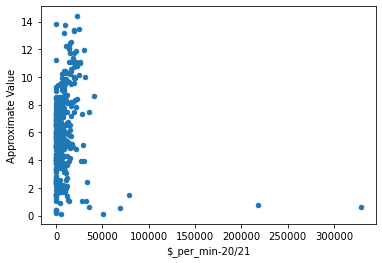

In [151]:
merged_df_21.plot(kind = "scatter", x ="$_per_min-20/21", y = "Approximate Value")

In [155]:
#Using the .describe method, over the ["$_per_min-20/21"]  column, the data is right-skewed.
# Meaning over 75% of the data points are less than or equal to 11.7k, with
#with the mean at $9.7 or $10k

merged_df_21["$_per_min-20/21"].describe()

count       318.000000
mean       9724.232593
std       23606.024796
min           0.000000
25%           0.000000
50%        5571.362062
75%       11705.533874
max      328571.406250
Name: $_per_min-20/21, dtype: float64

<AxesSubplot:xlabel='$_per_min-20/21', ylabel='Approximate Value'>

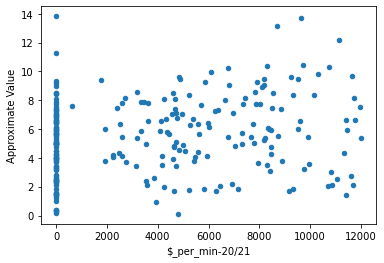

In [158]:
#There are definitely some outliers. Perhaps players with really high per-minute salary 
# while only played small amount of games due to injuries

merged_df_21[merged_df_21["$_per_min-20/21"] <= 12000].plot(kind = "scatter", x="$_per_min-20/21", y = "Approximate Value")
